## Оценка эффективности торговых точек
Необходимо оценить эффективность магазинов сети. Для этого
- Проведем исследовательский анализ данных;
- Оценим эффективность;
- Сформулируем и проверем статистические гипотезы.
Датасет содержит данные о покупках в магазине строительных материалов. Все покупатели могут получить доступ в магазин с использованием персональных карт. За 200 рублей в месяц они могут стать участниками программы лояльности. В программу включены скидки, специальные предложения, подарки.

Данное исследование разделим на несколько частей.
### Часть 1. Изучение общей информаци
- Изученеие файлов с данными, получение общей информации, загрузка библиотек

### Часть 2. Подготовка данных
- Замена названия столбцов
- Приведение данных к нужным типам
- Нахождение и исправление аномалий и ошибок
- Добавление данных в таблицы (неделя, месяц)

### Часть 3. Исследовательский анализ данных
- Количество продаж (позиций) за неделю, месяц по торговым точкам (график)
- Количество чеков за неделю, месяц по торговым точкам (график)
- Выручка за неделю, месяц по торговым точкам (график)
- Количество покупателей (с картами) за неделю, месяц по торговым точкам (график)
- Количество возврата за неделю, месяц по торговым точкам (график)

### Часть 4. Оценка эффективности торговых точек
- Объем продаж (выручка) по торговым точкам за весь период
- Среднее количество позиций в чеке за весь период
- Размер среднего чека по торговым точкам за весь период
- Количество возвратов (соотношение возврат/покупка) по торговым точкам за весь период

### Часть 5. Проверка гипотез
- Средний чек у покупателей участвующих в программе лояльности не отличается от среднего чека у покупателей не участвующих в программе.
- Среднее количество товара в чеке у покупателей участвующих в программе лояльности равно среднему количеству товара в чеке у покупателей не участвующих в программе.

### Общий вывод

Пояснения:
- не все отрицательные значения в количестве товара это возвраты, мое предположение, что все "стандартные" числовые значения - возвраты, остальные - нет, это какие-то комиссии: банковские, почтовые, площадки Amazon, т.е. не код товара;

## Часть 1. Изучение общей информаци

#### - Изученеие файлов с данными, получение общей информации, загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats

In [2]:
product_codes = pd.read_csv("product_codes.csv")

In [3]:
retail_dataset = pd.read_csv("retail_dataset.csv")

In [4]:
def general_information(data):
    data.info()
    print()
    display(data.head())
    print()
    print('Дубликатов', data.duplicated().sum(), 'или', round(data.duplicated().sum() / len(data) * 100), '%')

In [5]:
general_information(product_codes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB



,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39



Дубликатов 0 или 0.0 %


In [6]:
general_information(retail_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB



,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0



Дубликатов 1033 или 1.0 %


In [7]:
def unique_value(data, column):
    print('Уникальное значение', column,':', data[column].unique())
    print()

In [8]:
unique_value(product_codes, 'productID')

Уникальное значение productID : ['85123A' '71053' '84406B' ... '90187A' '90001A' '20738']



In [9]:
unique_value(retail_dataset, 'ShopID')

Уникальное значение ShopID : ['Shop 0' 'Shop 1' 'Shop 4' 'Shop 6' 'Shop 2' 'Shop 11' 'Shop 3' 'Shop 5'
 'Shop 7' 'Shop 12' 'Shop 8' 'Shop 27' 'Shop 10' 'Shop 20' 'Shop 19'
 'Shop 25' 'Shop 14' 'Shop 21' 'Shop 18' 'Shop 9' 'Shop 16' 'Shop 28'
 'Shop 29' 'Shop 17' 'Shop 22' 'Shop 13' 'Shop 26' 'Shop 24' 'Shop 15'
 'Shop 23' 'Shop 30']



In [10]:
# Посмотрим на дубликаты
retail_dataset[retail_dataset.duplicated(keep=False)].head(20)

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
39,545071,85036A,0,2017-02-27 15:59:00,21675.0,Shop 0,0.0
116,537772,22659,3,2016-12-08 12:35:00,23722.0,Shop 0,1.0
248,544336,22858,0,2017-02-17 19:36:00,18909.0,Shop 0,0.0
360,541251,22284,11,2017-01-16 13:25:00,20725.0,Shop 0,0.0
505,536522,21122,0,2016-12-01 12:49:00,20691.0,Shop 0,0.0
527,541266,22988,11,2017-01-16 16:25:00,21352.0,Shop 0,0.0
540,537196,21811,0,2016-12-05 13:55:00,21105.0,Shop 0,0.0
586,538371,84030E,0,2016-12-12 11:07:00,21249.0,Shop 0,0.0
730,541414,21755,0,2017-01-17 16:14:00,23891.0,Shop 0,1.0
780,542213,47566,0,2017-01-26 12:15:00,19516.0,Shop 0,0.0


In [11]:
# Расмотрим более детально чек, в которм имеются дубликаты
retail_dataset.query('purchaseid == "541266"').sort_values(by='Quantity')

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
30256,541266,21754,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
894,541266,21754,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
97080,541266,21755,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
86414,541266,21755,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
86288,541266,21754,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
79250,541266,21754,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
30131,541266,21754,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
14909,541266,21755,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
69124,541266,21755,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0
31642,541266,21755,0,2017-01-16 16:25:00,21352.0,Shop 0,0.0


Мы видим, что в чеке 2 пары дублей, такое вполне возможно.

In [12]:
print('Количество нулевых значений в столбце Quantity составляет', len(retail_dataset.query('Quantity == 0')), 'или',
      round(len(retail_dataset.query('Quantity ==0')) / len(retail_dataset) * 100), '%')

Количество нулевых значений в столбце Quantity составляет 33055 или 31 %


Text(0, 0.5, 'count')

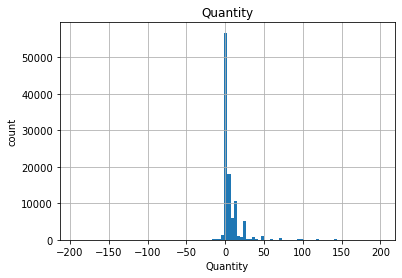

In [13]:
retail_dataset.query('Quantity > -200 & Quantity < 200')['Quantity'].hist(bins=100)
plt.title('Quantity')
plt.xlabel('Quantity')
plt.ylabel('count')

In [14]:
# Более детально рассмотрим нулевые значения в столбце Quantity
quantity0 = retail_dataset.query('Quantity == 0')['item_ID'].value_counts().reset_index()

In [15]:
quantity0

,index,item_ID
0,DOT,174
1,22423,121
2,21034,109
3,22625,96
4,22624,90
...,...,...
2796,85106,1
2797,35443,1
2798,90123D,1
2799,90141D,1


In [16]:
# максимальные цены на товары, из тех, которые в чеках имеют количество = 0, посмотрим на самые дорогие
product_codes[product_codes['productID'].isin(quantity0['index'])].pivot_table(
    index='productID', values='price_per_one', aggfunc='max').reset_index().sort_values(by='price_per_one').tail(20)

,productID,price_per_one
1519,22802,39.96
2795,POST,40.00
2799,gift_0001_50,42.55
1489,22769,51.02
1245,22503,59.53
2129,84632,59.95
1638,22929,65.00
2018,84078A,76.55
686,21769,79.95
1547,22833,100.00


Исследуемый период

In [17]:
retail_dataset['purchasedate'].min()

'2016-12-01 08:26:00'

In [18]:
retail_dataset['purchasedate'].max()

'2017-02-28 17:04:00'

### Вывод
- Каждая строка таблицы "retail_dataset" содержит информацию данные о покупках за период с 1 декабря 2016 по 28 февраля 2017 в магазине строительных материалов: `purchaseId` — id чека,`item_ID` — id товара, `purchasedate` — дата покупки; `Quantity` — количество товара; `CustomerID` — id покупателя; `ShopID` — id магазина; `loyalty_program` — участвует ли покупатель в программе лояльности. Таблица product_codes.csv: - `productID` — id товара; `price_per_one` — стоимость одной единицы товара.
- Первый взгляд на таблицу. Необходимо заменить тип данных в соответствии с типом данных представленных в столбцах: "purchasedate" - в формат даты, "CustomerID" - в целочисленный, "loyalty_program" - в целочисленный, можно было бы и в булевый, но мне так больше нравится.
- Имеется большое количество пропусков в значениях CustomerID, по какой причине они возникают? Версия - не все покупатели имеют карты этого магазина, поэтому никак не идентифицируются в нашем датасете. Можно пропуски заполнить нулями.
- Один процент дубликатов, дубликаты могут быть обусловлены тем, что в одном чеке выбиты одинаковые товары, но не подряд, поэтому не суммируются в чеке, а отмечаются как еще одна позиция. Соответственно, ничего с этим делать не будем.
- 31 % нулевых значений в количестве товара, это очень много. Причины возникновения их, может сбой, при значении 10 присваивается 0? Но с другой стороны очень большой процент покупок с таким количеством.

## Часть 2. Подготовка данных

#### - Замена названия столбцов

In [19]:
# замена названия столбцов (приведение к нижнему регистру) "retail_dataset"
retail_dataset.columns = map(str.lower, retail_dataset.columns)

In [20]:
# замена названия столбцов "retail_dataset"
retail_dataset = retail_dataset.rename({'purchaseid': 'purchase_id','purchasedate':'purchase_date',
                                        'customerid': 'customer_id', 'shopid': 'shop_id'}, axis='columns')

In [21]:
# замена названия столбцов "product_codes"
product_codes = product_codes.rename({'productID':'product_id'}, axis='columns')

In [22]:
retail_dataset.columns

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'shop_id', 'loyalty_program'],
      dtype='object')

In [23]:
product_codes.columns

Index(['product_id', 'price_per_one'], dtype='object')

#### - Приведение данных к нужным типам

In [24]:
def tipe_change(data, column, tipe): # функция для замены типов данных 
    if tipe == 'datetime':
        data[column] = pd.to_datetime(data[column])
        print(data[column].dtypes)
    else:
        data[column] = data[column].astype(tipe, errors='ignore')
        print(data[column].dtypes)

In [25]:
tipe_change(retail_dataset, 'purchase_date', 'datetime')

datetime64[ns]


In [26]:
tipe_change(retail_dataset, 'customer_id', 'int64')

float64


In [27]:
tipe_change(retail_dataset, 'loyalty_program', 'int64')

int64


Тип данных не получилось поменять в стобце 'customer_id', заменем позже, когда избавимся от NaN

#### - Нахождение и исправление аномалий и ошибок

Анализ временного периода

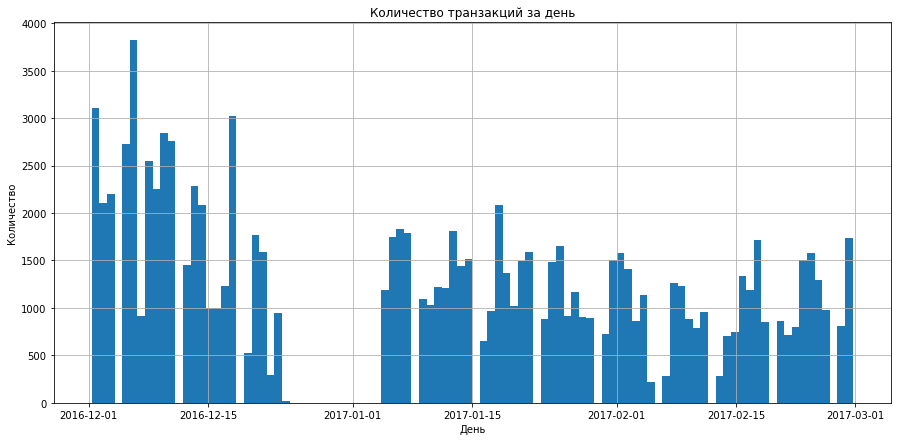

In [28]:
retail_dataset['purchase_date'].hist(bins=100, figsize = (15,7))
plt.title('Количество транзакций за день')
plt.xlabel('День')
plt.ylabel('Количество')
plt.show()

Имеется период, когда магазины не работали, наверное, это называется рождественскими каникулами. Получается, что это или Западная или Северная Европа, ну или Америка.

In [29]:
retail_dataset['customer_id'].describe()

count    69125.000000
mean     21019.302047
std       1765.444679
min      18025.000000
25%      19544.000000
50%      20990.000000
75%      22659.000000
max      23962.000000
Name: customer_id, dtype: float64

##### Т.к. было предположено, что отсутствующие значения в столбце "customer_id", это покупки без карты магазина, произведем замену таких значений на "0". Такого значения в исходных данных нет, поэтому результат не будет искажен.

In [30]:
retail_dataset['customer_id']= retail_dataset['customer_id'].fillna('0')

Заменены значение NaN  в столбце "customer_id" на "0".

In [31]:
# Теперь поменяем тип данных на целочисленный
tipe_change(retail_dataset, 'customer_id', 'int64')

int64


In [32]:
retail_dataset.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      105335 non-null  int64         
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ MB


##### С помощью регулярных выражений найдем значения в столбце кода товара, которые будем считать "комиссиями"

In [33]:
product_codes['product_id'].str.extract(r'([A-Za-z ]+)').reset_index()[0].unique()

array(['A', nan, 'B', 'G', 'E', 'POST', 'L', 'C', 'S', 'BL', 'N', 'D',
       'F', 'T', 'H', 'M', 'P', 'J', 'R', 'DOT', 'K', 'V', 'W',
       'BANK CHARGES', 'bl', 'p', 'b', 'a', 'l', 's', 'c', 'e', 'I', 'Y',
       'd', 'f', 'U', 'AMAZONFEE', 'n', 'Z', 'O', 'DCGS', 'k', 'gift',
       'm', 'g', 'DCGSSBOY', 'DCGSSGIRL'], dtype=object)

In [34]:
product_codes['product_id'].str.extract(r'([A-Za-z ]+[A-Za-z0-9]+)').reset_index()[0].unique()

array([nan, 'POST', 'BL', 'C2', 'DOT', 'BANK CHARGES', 'bl', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift', 'DCGS0070', 'DCGS0055', 'DCGS0072',
       'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY', 'DCGSSGIRL'],
      dtype=object)

In [35]:
product_codes['product_id'].str.extract(r'([A-Za-z ]+[A-Za-z]+)').reset_index()[0].unique()

array([nan, 'POST', 'BL', 'DOT', 'BANK CHARGES', 'bl', 'AMAZONFEE',
       'DCGS', 'gift', 'DCGSSBOY', 'DCGSSGIRL'], dtype=object)

In [36]:
retail_dataset['item_id'].str.extract(r'([A-Za-z ]+[A-Za-z]+)').reset_index()[0].unique()

array([nan, 'DOT', 'POST', 'BL', 'AMAZONFEE', 'BANK CHARGES', 'bl',
       'gift', 'DCGSSBOY', 'DCGSSGIRL', 'DCGS'], dtype=object)

In [37]:
retail_dataset['item_id'].str.extract(r'([A-Za-z _]+[0-9A-Za-z0-9]+)').reset_index()[0].unique()

array([nan, 'DOT', 'POST', 'BL', 'AMAZONFEE', 'BANK CHARGES', 'C2', 'bl',
       'gift_0001', 'DCGSSBOY', 'DCGSSGIRL', 'DCGS0074', 'DCGS0057',
       'DCGS0003', 'DCGS0072', 'DCGS0055', 'DCGS0076', 'DCGS0070',
       'DCGS0069'], dtype=object)

In [38]:
retail_dataset['item_id'].str.extract(r'([A-Za-z ]+)').reset_index()[0].unique()

array([nan, 'L', 'A', 'B', 'G', 'C', 'S', 'D', 'E', 'DOT', 'F', 'a', 'b',
       'N', 'POST', 'U', 'K', 'BL', 'AMAZONFEE', 'BANK CHARGES', 'p', 'W',
       'M', 'P', 'I', 's', 'c', 'H', 'J', 'l', 'd', 'R', 'e', 'bl',
       'gift', 'DCGSSBOY', 'DCGSSGIRL', 'V', 'f', 'k', 'n', 'm', 'DCGS',
       'Z', 'T', 'g', 'O', 'Y'], dtype=object)

In [39]:
# список, и обозначеный как "комиссии"
fee = 'POST', 'BL', 'C2', 'DOT', 'BANK CHARGES', 'bl','DCGS0076', 'DCGS0003', 'gift_0001', 'DCGS0070', 'DCGS0055',\
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY','A', 'B', 'G', 'E', 'POST', 'L', 'C', 'S', 'BL', 'N', 'D',\
       'F', 'T', 'H', 'M', 'P', 'J', 'R', 'DOT', 'K', 'V', 'W','bl', 'p', 'b', 'a', 'l', 's', 'c', 'e', 'I', 'Y',\
       'd', 'f', 'U', 'AMAZONFEE', 'n', 'Z', 'O', 'DCGS', 'k', 'gift','m', 'g', 'DCGSSBOY', 'DCGSSGIRL'

In [40]:
retail_dataset[retail_dataset['item_id'].isin(fee)]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
208,538153,DOT,0,2016-12-09 16:31:00,0,Shop 0,0
502,545017,POST,0,2017-02-25 13:51:00,18040,Shop 12,0
722,542147,POST,3,2017-01-26 10:02:00,18461,Shop 10,0
1071,537643,DOT,0,2016-12-07 15:34:00,0,Shop 0,0
1100,C540057,POST,-2,2017-01-04 14:29:00,18162,Shop 19,0
...,...,...,...,...,...,...,...
104266,537225,M,0,2016-12-05 16:41:00,18427,Shop 0,0
104421,539403,POST,1,2016-12-17 12:21:00,18326,Shop 4,0
104690,C544576,BANK CHARGES,-2,2017-02-21 14:01:00,0,Shop 0,0
105015,539317,M,1,2016-12-16 19:04:00,23071,Shop 0,1


In [41]:
print('Количество "комиссионных" значений в столбце item_id составляет', len(
      retail_dataset[retail_dataset['item_id'].isin(fee)]), 'или',
      round(len(retail_dataset[retail_dataset['item_id'].isin(fee)]) / len(retail_dataset) * 100), '%')

Количество "комиссионных" значений в столбце item_id составляет 580 или 1 %


580 строк, которые содержат наименования товаров, которые выделены отдельным списком, и обозначены как "комиссии" (для нас подозрительные). Почистим от таких строк датафрейм. Можно удалить, данное действие не должно повлиять на итоговый результат

In [42]:
# отфильтруем исходный датафрейм, исключив строки с подозрительными значениями в "item_id"
retail_dataset = retail_dataset[~retail_dataset['item_id'].isin(fee)]

##### Посмотрим на отрицательные значения количества товаров 

In [43]:
 retail_dataset[retail_dataset['quantity'] < 0]

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
64,C539944,22776,-2,2016-12-23 11:38:00,20239,Shop 0,0
109,C542910,20726,-2,2017-02-01 15:38:00,23190,Shop 0,1
112,C542426,22418,-25,2017-01-28 09:32:00,19825,Shop 0,0
253,C539726,22791,-11,2016-12-21 14:24:00,22686,Shop 0,1
344,C544034,21878,-2,2017-02-15 11:28:00,20380,Shop 0,0
...,...,...,...,...,...,...,...
105139,542572,85064,-2,2017-01-28 14:54:00,0,Shop 0,0
105172,C540246,79320,-2,2017-01-05 15:43:00,18760,Shop 0,0
105211,C539467,22801,-2,2016-12-19 12:46:00,20723,Shop 0,0
105250,C540847,22197,-3,2017-01-11 17:35:00,19137,Shop 0,0


Это часто чеки начинающиеся на "С", выделем их из датафрейма

In [44]:
# Поиск строк с чеками начинающихся на "С"
retail_dataset_C = retail_dataset["purchase_id"].str.startswith("C").reset_index().query('purchase_id == True')

In [45]:
retail_dataset_C

,index,purchase_id
64,64,True
109,109,True
112,112,True
252,253,True
343,344,True
...,...,...
104477,105056,True
104592,105172,True
104631,105211,True
104670,105250,True


In [46]:
print('Количество чеков начинающихся на "С" составляет', len(retail_dataset_C), 'или',
      round(len(retail_dataset_C) / len(retail_dataset) * 100), '%')

Количество чеков начинающихся на "С" составляет 1795 или 2 %


In [47]:
# Исходный датафрейм с индексом
retail_dataset_index = retail_dataset.reset_index()

In [48]:
retail_dataset_index

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0
1,1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1
2,2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1
3,3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1
4,4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1
...,...,...,...,...,...,...,...,...
104750,105330,538566,21826,1,2016-12-13 11:21:00,0,Shop 0,0
104751,105331,540247,21742,0,2017-01-05 15:56:00,21143,Shop 0,0
104752,105332,538068,85048,1,2016-12-09 14:05:00,23657,Shop 0,1
104753,105333,538207,22818,11,2016-12-10 11:33:00,18427,Shop 0,0


In [49]:
# убраны все строки с идентификатором чека равным С*****
retail_dataset_free_c = retail_dataset_index[~retail_dataset_index['index'].isin(retail_dataset_C['index'])].copy()

In [50]:
# retail_dataset_free_c = retail_dataset.copy()

In [51]:
retail_dataset_free_c

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
0,0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0
1,1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1
2,2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1
3,3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1
4,4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1
...,...,...,...,...,...,...,...,...
104750,105330,538566,21826,1,2016-12-13 11:21:00,0,Shop 0,0
104751,105331,540247,21742,0,2017-01-05 15:56:00,21143,Shop 0,0
104752,105332,538068,85048,1,2016-12-09 14:05:00,23657,Shop 0,1
104753,105333,538207,22818,11,2016-12-10 11:33:00,18427,Shop 0,0


In [52]:
# выборка строк с идентификатором чека равным С*****
retail_dataset_c = retail_dataset_index[retail_dataset_index['index'].isin(retail_dataset_C['index'])].copy()

In [53]:
retail_dataset_c

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
64,64,C539944,22776,-2,2016-12-23 11:38:00,20239,Shop 0,0
109,109,C542910,20726,-2,2017-02-01 15:38:00,23190,Shop 0,1
112,112,C542426,22418,-25,2017-01-28 09:32:00,19825,Shop 0,0
252,253,C539726,22791,-11,2016-12-21 14:24:00,22686,Shop 0,1
343,344,C544034,21878,-2,2017-02-15 11:28:00,20380,Shop 0,0
...,...,...,...,...,...,...,...,...
104477,105056,C544397,22063,-2,2017-02-18 12:21:00,18141,Shop 8,0
104592,105172,C540246,79320,-2,2017-01-05 15:43:00,18760,Shop 0,0
104631,105211,C539467,22801,-2,2016-12-19 12:46:00,20723,Shop 0,0
104670,105250,C540847,22197,-3,2017-01-11 17:35:00,19137,Shop 0,0


In [54]:
retail_dataset_c.query('quantity > 0')

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program


Видно, что в выборке строк с идентификатором чека равным С***** нет количества, которое было бы больше 0

##### Посмотрим на строки с оставшимися отрицательными значениями в столбце количества

In [55]:
retail_dataset_free_c.query('quantity < 0')

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
467,468,537032,21275,-31,2016-12-03 16:50:00,0,Shop 0,0
501,503,540119,22865,-61,2017-01-05 10:07:00,0,Shop 0,0
907,910,540241,35957,-940,2017-01-05 15:17:00,0,Shop 0,0
1777,1784,537009,84534B,-81,2016-12-03 15:38:00,0,Shop 0,0
1918,1928,540010,22501,-101,2017-01-04 11:13:00,0,Shop 0,0
...,...,...,...,...,...,...,...,...
102453,103022,542225,85096,-60,2017-01-26 13:10:00,0,Shop 0,0
102962,103534,540558,21258,-30,2017-01-10 10:04:00,0,Shop 0,0
104011,104588,541487,85118,-36,2017-01-18 13:19:00,0,Shop 0,0
104382,104960,540564,22617,-2601,2017-01-10 10:36:00,0,Shop 0,0


In [56]:
# сгруппируем по чекам, чтоб посмотреть, сколько в таких чеках товаров в датафрейме без "С", отсортируем по возрастанию кол-ва
retail_dataset_free_c.query('quantity < 0').groupby('purchase_id')['item_id'].count().reset_index().sort_values(by='item_id')

,purchase_id,item_id
0,536589,1
133,542551,1
134,542552,1
135,542553,1
136,542554,1
...,...,...
74,540000,1
75,540008,1
76,540009,1
52,538054,1


In [57]:
# сгруппируем по чекам, чтоб посмотреть, сколько в таких чеках товаров в датафреймес "С", отсортируем по возрастанию кол-ва
retail_dataset_c.query('quantity < 0').groupby('purchase_id')['item_id'].count().reset_index().sort_values(by='item_id')

,purchase_id,item_id
0,C536383,1
424,C541589,1
423,C541586,1
422,C541573,1
420,C541512,1
...,...,...
347,C540417,21
87,C537860,21
125,C538350,26
516,C542426,35


In [58]:
retail_dataset.query('purchase_id == "540564"')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
104960,540564,22617,-2601,2017-01-10 10:36:00,0,Shop 0,0


In [59]:
retail_dataset.query('purchase_id == "C540417"')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
748,C540417,85099B,-101,2017-01-07 10:56:00,19359,Shop 0,0
3077,C540417,20719,-31,2017-01-07 10:56:00,19359,Shop 0,0
4748,C540417,20728,-31,2017-01-07 10:56:00,19359,Shop 0,0
14317,C540417,84991,-25,2017-01-07 10:56:00,19359,Shop 0,0
25412,C540417,85099C,-31,2017-01-07 10:56:00,19359,Shop 0,0
29709,C540417,22326,-7,2017-01-07 10:56:00,19359,Shop 0,0
37406,C540417,22628,-5,2017-01-07 10:56:00,19359,Shop 0,0
42446,C540417,84997D,-25,2017-01-07 10:56:00,19359,Shop 0,0
43711,C540417,20726,-41,2017-01-07 10:56:00,19359,Shop 0,0
46737,C540417,21430,-25,2017-01-07 10:56:00,19359,Shop 0,0


Предположение, что если в чеке есть отрицательное значение количества товара - это возврат. Но есть два вида таких чеков, с идентификатором чека равным С***** и просто цифры. В первом случае таких чеков 739 и они все содержат товары с отрицательным количеством, во втором, 210 - это чеки с одной позицей в чеке. М.б. как раз это и есть возврат. Будем иметь в виду это предположение при исследовании данных и подсчете метрик

##### Посмотрим на нулевые значения в количеству товара

In [60]:
retail_dataset.query('quantity == 0')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1
3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1
4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1
5,538379,22965,0,2016-12-12 11:26:00,22805,Shop 0,1
6,540468,22189,0,2017-01-07 13:55:00,0,Shop 0,0
...,...,...,...,...,...,...,...
105314,538073,22439,0,2016-12-09 14:10:00,23495,Shop 0,1
105315,543306,22898,0,2017-02-07 11:56:00,22365,Shop 0,1
105316,543013,22266,0,2017-02-02 13:35:00,0,Shop 0,0
105327,538349,22625,0,2016-12-10 14:59:00,0,Shop 0,0


In [61]:
# сгруппируем по чекам, чтоб посмотреть, сколько в чеках товаров, где есть товары, отсортируем по возрастанию кол-ва
retail_dataset.query('quantity == 0').groupby('purchase_id')['item_id'].count().reset_index().sort_values(by='item_id').tail(10)

,purchase_id,item_id
248,537666,289
20,536544,298
90,536876,298
273,537823,321
173,537237,322
238,537638,326
38,536592,335
217,537434,343
316,538071,344
372,538349,354


In [62]:
retail_dataset.query('purchase_id == "543826"')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
165,543826,22295,1,2017-02-14 09:41:00,0,Shop 0,0
279,543826,85131A,11,2017-02-14 09:41:00,0,Shop 0,0
1456,543826,21002,0,2017-02-14 09:41:00,0,Shop 0,0
2156,543826,85039B,0,2017-02-14 09:41:00,0,Shop 0,0
2323,543826,85114B,0,2017-02-14 09:41:00,0,Shop 0,0
...,...,...,...,...,...,...,...
99538,543826,22743,0,2017-02-14 09:41:00,0,Shop 0,0
102285,543826,22989,0,2017-02-14 09:41:00,0,Shop 0,0
102333,543826,22489,1,2017-02-14 09:41:00,0,Shop 0,0
102385,543826,22697,1,2017-02-14 09:41:00,0,Shop 0,0


In [63]:
retail_dataset.query('purchase_id == "538073"')

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
6638,538073,16008,1,2016-12-09 14:10:00,23495,Shop 0,1
26848,538073,11001,0,2016-12-09 14:10:00,23495,Shop 0,1
30994,538073,16016,1,2016-12-09 14:10:00,23495,Shop 0,1
41113,538073,47504K,0,2016-12-09 14:10:00,23495,Shop 0,1
41808,538073,22553,1,2016-12-09 14:10:00,23495,Shop 0,1
51570,538073,21311,0,2016-12-09 14:10:00,23495,Shop 0,1
67683,538073,16015,0,2016-12-09 14:10:00,23495,Shop 0,1
72423,538073,16014,0,2016-12-09 14:10:00,23495,Shop 0,1
81053,538073,21544,3,2016-12-09 14:10:00,23495,Shop 0,1
105314,538073,22439,0,2016-12-09 14:10:00,23495,Shop 0,1


Учитывая, какие были сделаны выводы в предварительном анализе подозрительных данных, а также сейчас посмотрев на такие чеки, объяснение, что это подарки, бонусы или просто позиция, которая не для учета продаж. Не похоже на сбой все же, угадывать, на какое значение необходимо заменить нет смысла, просто при анализе и расчете метрик, не будем такие строки учитывать.

##### Таблица с ценами product_codes.csv: - `product_id` — id товара; `price_per_one` — стоимость одной единицы товара.

In [64]:
product_codes['price_per_one'].describe()

count     9969.000000
mean        19.503697
std        330.880754
min          0.000000
25%          1.250000
50%          2.550000
75%          5.510000
max      16888.020000
Name: price_per_one, dtype: float64

В таблице цен имеются товары с ценой в 0 у.е., посмотрим внимательнее

In [65]:
product_codes.query('price_per_one == 0')

,product_id,price_per_one
427,22139,0.0
1356,21134,0.0
1357,22145,0.0
1358,37509,0.0
1363,85226A,0.0
...,...,...
9909,22699,0.0
9910,22698,0.0
9911,22689,0.0
9912,22649,0.0


In [66]:
print('Количество товаров с ценой равной 0 составляет', len(product_codes.query('price_per_one == 0')), 'или',
      round(len(product_codes.query('price_per_one == 0')) / len(product_codes) * 100), '%')

Количество товаров с ценой равной 0 составляет 382 или 4 %


Не будем на этом акцентировать внимание, т.к. эти цены не будут влиять на итоговый результат, но чтоб они не мешали в дальнейших расчетах, просто сделаем выборку исключив данный строки из прайса. 

In [67]:
product_codes = product_codes.query('price_per_one > 0').copy()

In [68]:
price_count = product_codes.groupby('product_id')['price_per_one'].count().reset_index().sort_values(by='price_per_one')

In [69]:
price_count.groupby('price_per_one')['product_id'].count().reset_index()

,price_per_one,product_id
0,1,683
1,2,546
2,3,773
3,4,625
4,5,230
5,6,165
6,7,47
7,8,19
8,9,7
9,10,2


Имеются товары с неуникальными ценами, даже 174 цены на один товар, усредним (найдем медиану) цену в зависимости от товара. На товар, где цена на товар не больше одной, данное действие никак не повлияет.

In [70]:
price_count.query('price_per_one > 5').head()

,product_id,price_per_one
1216,22355,6
1217,22356,6
2040,48188,6
65,17003,6
316,21065,6


In [71]:
product_codes.query('product_id == "22773"').head(50)

,product_id,price_per_one
300,22773,1.25
3977,22773,2.51
5230,22773,0.85
6457,22773,1.49
8075,22773,2.46
9938,22773,2.50


In [72]:
product_codes.query('product_id == "21907"')

,product_id,price_per_one
264,21907,2.10
3688,21907,4.21
3810,21907,1.85
8591,21907,4.13


In [73]:
# находим медиану по каждому товару
product_codes_medians = product_codes.groupby('product_id')['price_per_one'].median().reset_index() 

In [74]:
# посчитаны медианы и создана таблица с ними
product_codes_medians.columns = ['product_id', 'product_codes_medians']

In [75]:
# соединяем полученную таблицу с медианами с исходной таблицей
product_codes_1 = product_codes.merge(product_codes_medians, on='product_id')

In [76]:
# проверка на пропущенные значения
product_codes_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9587 entries, 0 to 9586
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             9587 non-null   object 
 1   price_per_one          9587 non-null   float64
 2   product_codes_medians  9587 non-null   float64
dtypes: float64(2), object(1)
memory usage: 299.6+ KB


In [77]:
product_codes_1

,product_id,price_per_one,product_codes_medians
0,85123A,2.55,3.24
1,85123A,2.95,3.24
2,85123A,5.91,3.24
3,85123A,3.24,3.24
4,85123A,5.79,3.24
...,...,...,...
9582,90176A,7.48,7.48
9583,90176C,8.32,8.32
9584,90177A,2.90,2.90
9585,90187A,3.32,3.32


In [78]:
# Удалим столбец "price_per_one"
product_codes_1 = product_codes_1.drop(['price_per_one'], axis = 1)

In [79]:
# Удалим дубликаты
product_codes_1 = product_codes_1.drop_duplicates().reset_index(drop=True)

In [80]:
product_codes_1

,product_id,product_codes_medians
0,85123A,3.24
1,71053,6.02
2,84406B,3.75
3,84029G,7.54
4,84029E,7.46
...,...,...
3097,90176A,7.48
3098,90176C,8.32
3099,90177A,2.90
3100,90187A,3.32


После усреднения цен из 10000 строк осталось 3100.

#### - Добавление данных в таблицы (неделя, месяц)

Сразу будем работать с таблицей "retail_datase_free_c", в которой удалены строки с подозрительными товарами ('DOT', 'POST', 'AMAZONFEE', 'BANK CHARGES' и т.д.) и чеки начинающиеся на С, которые имеют отрицательное количество товаров.

In [81]:
# столбец с месяцем и годом
retail_dataset_free_c['month_year'] = retail_dataset_free_c['purchase_date'].apply(lambda x: x.strftime('%B-%Y'))

In [82]:
retail_dataset_free_c['week'] = retail_dataset_free_c['purchase_date'].dt.week  # добавлен столбец с номером недели

In [83]:
retail_dataset_free_c['year'] = retail_dataset_free_c['purchase_date'].dt.year  # добавлен столбец с годом

In [84]:
retail_dataset_free_c['month'] = retail_dataset_free_c['purchase_date'].dt.month  # добавлен столбец с номером недели

In [85]:
retail_dataset_free_c

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,month_year,week,year,month
0,0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,December-2016,49,2016,12
1,1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,December-2016,50,2016,12
2,2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,December-2016,50,2016,12
3,3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,February-2017,6,2017,2
4,4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,February-2017,7,2017,2
...,...,...,...,...,...,...,...,...,...,...,...,...
104750,105330,538566,21826,1,2016-12-13 11:21:00,0,Shop 0,0,December-2016,50,2016,12
104751,105331,540247,21742,0,2017-01-05 15:56:00,21143,Shop 0,0,January-2017,1,2017,1
104752,105332,538068,85048,1,2016-12-09 14:05:00,23657,Shop 0,1,December-2016,49,2016,12
104753,105333,538207,22818,11,2016-12-10 11:33:00,18427,Shop 0,0,December-2016,49,2016,12


### Часть 3. Исследовательский анализ данных

#### - Количество продаж (позиций) за неделю, месяц по торговым точкам (график), количество чеков за неделю, месяц по торговым точкам (график), количество покупателей (с картами) за неделю, месяц по торговым точкам (график), выручка за неделю, месяц по торговым точкам (график)

In [86]:
# Функция для построения графиков, точка Shop 0 выедена в отделное поле, т.к. очень сильно отличаются значения от других точек
dict_for_auto = {
    'customer_id':['Количество  уникальных покупателей (с картами)', 'nunique'],
    'item_id':['Количество продаж (позиций)', 'count'],
    'purchase_id':['Количество чеков', 'nunique'], 
    'total':['Выручка', 'sum']
}
def graph(data, period): 
    for column in dict_for_auto.keys():
        print()
        if column == 'customer_id':
        # для подсчета уникальных покупателей, необходимо исключить, покупателей без карт
            retail_dataset_count_0 = data.query('shop_id == "Shop 0" & customer_id > 0').pivot_table(
                             index = [period, 'year'],columns = 'shop_id', values = column, aggfunc = dict_for_auto[column][1])
            retail_dataset_count = data.query('shop_id != "Shop 0" & customer_id > 0').pivot_table(
                             index = [period, 'year'],columns = 'shop_id', values = column, aggfunc = dict_for_auto[column][1])
        else:    
            retail_dataset_count_0 = data.query('shop_id == "Shop 0"').pivot_table(
                             index = [period, 'year'], columns = 'shop_id', values = column, aggfunc = dict_for_auto[column][1])
            retail_dataset_count = data.query('shop_id != "Shop 0"').pivot_table(
                             index = [period, 'year'], columns = 'shop_id', values = column, aggfunc = dict_for_auto[column][1])
        retail_dataset_count_0.sort_values(by='year').plot(figsize = (10,4), grid = True)
        plt.xticks(rotation=40)
        plt.title(dict_for_auto[column][0] + ' в торговой точке Shop 0') 
        plt.gca().set(xlabel=period, ylabel='count')
        plt.legend(bbox_to_anchor=(1.2, 1))
        plt.show()
        print()
        retail_dataset_count.sort_values(by='year').plot(figsize = (10,4), grid = True)
        plt.xticks(rotation=40)
        plt.title(dict_for_auto[column][0] + ' в других торговых точках')
        plt.gca().set(xlabel=period, ylabel='count')
        plt.legend(bbox_to_anchor=(1.2, 1.5))
        plt.show()

##### При построении графиков уберем все строки со значениями меньше 0 в количестве товара. Оставим данные, где количество товара равно 0, посмотрим сколько всего позиций продано/отдано и потом можно будет  провести сравнительный анализ по количеству позиций в случае, когда 0 в количестве не будет учитываться.

In [87]:
# датафрейм отфильтрованный по количеству товаров
retail_data = retail_dataset_free_c.query('quantity >= 0').copy()

##### Произведем следующие действия для вычисления выручки

In [88]:
# соеденим две таблицы: продаж и прайс
retail_data = pd.merge(retail_data, product_codes_1, how='left', left_on='item_id', right_on='product_id')

In [89]:
# проверка на пропущенные значения
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102750 entries, 0 to 102749
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  102750 non-null  int64         
 1   purchase_id            102750 non-null  object        
 2   item_id                102750 non-null  object        
 3   quantity               102750 non-null  int64         
 4   purchase_date          102750 non-null  datetime64[ns]
 5   customer_id            102750 non-null  int64         
 6   shop_id                102750 non-null  object        
 7   loyalty_program        102750 non-null  int64         
 8   month_year             102750 non-null  object        
 9   week                   102750 non-null  int64         
 10  year                   102750 non-null  int64         
 11  month                  102750 non-null  int64         
 12  product_id             102731 non-null  obje

После того как соединили две таблицы, оказалось что в 19 строках отсутствует цена.

In [90]:
# произведем замену на -99, и посмотрим, что pf продажи оказались без цены
data = retail_data.replace(to_replace = np.nan, value = -99)
data.query('product_codes_medians == "-99"').head()

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,month_year,week,year,month,product_id,product_codes_medians
3705,3806,538142,84247C,0,2016-12-09 15:58:00,0,Shop 0,0,December-2016,49,2016,12,-99,-99.0
6101,6265,543258,84611B,1286,2017-02-04 16:06:00,0,Shop 0,0,February-2017,5,2017,2,-99,-99.0
15974,16371,536549,85226A,0,2016-12-01 14:34:00,0,Shop 0,0,December-2016,48,2016,12,-99,-99.0
19228,19685,543267,35645,2,2017-02-04 17:24:00,0,Shop 0,0,February-2017,5,2017,2,-99,-99.0
35965,36823,543049,79063C,319,2017-02-03 10:09:00,0,Shop 0,0,February-2017,5,2017,2,-99,-99.0


In [91]:
product_codes.query('product_id == "84611B"')

,product_id,price_per_one


In [92]:
product_codes.query('product_id == "35645"')

,product_id,price_per_one


Данных о цене нет ни в исходном прайсе, ни в модифицированном. Удалим строки с пропущенными значениями

In [93]:
retail_data = retail_data.dropna()

In [94]:
# проверка на пропущенные значения
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102731 entries, 0 to 102749
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  102731 non-null  int64         
 1   purchase_id            102731 non-null  object        
 2   item_id                102731 non-null  object        
 3   quantity               102731 non-null  int64         
 4   purchase_date          102731 non-null  datetime64[ns]
 5   customer_id            102731 non-null  int64         
 6   shop_id                102731 non-null  object        
 7   loyalty_program        102731 non-null  int64         
 8   month_year             102731 non-null  object        
 9   week                   102731 non-null  int64         
 10  year                   102731 non-null  int64         
 11  month                  102731 non-null  int64         
 12  product_id             102731 non-null  obje

Таблица подготовлена к дальнейшим действиям. Следующим шагом узнаем общую сумму товара, перемножив кол-во и цену.

In [95]:
retail_data['total'] = (retail_data.quantity * retail_data.product_codes_medians)
retail_data.head()

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,month_year,week,year,month,product_id,product_codes_medians,total
0,0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,December-2016,49,2016,12,21873,1.630,17.93
1,1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,December-2016,50,2016,12,22195,3.290,0.00
2,2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,December-2016,50,2016,12,21239,1.630,11.41
3,3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,February-2017,6,2017,2,22271,4.370,0.00
4,4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,February-2017,7,2017,2,79321,7.855,0.00


In [96]:
# Интересно посмотреть какая средняя цена товара у которого в количество 0 в таблице продаж
retail_data.query('total == 0.0')['product_codes_medians'].median()

3.34

3.34 у.е Очень похоже, что это какие - то подарки... Если конечно у.е. - это не Кувейтский Динар), но вроде как в Кувейте и не празднуют католическое Рождество)

In [97]:
df_pivot = pd.pivot_table(retail_data,index=['shop_id', 'week', 'month','year'], aggfunc={
    'purchase_id':'nunique', 'item_id':'count', 'customer_id':'nunique', 'total':'sum'}).reset_index()

In [98]:
# отнимем 1 в от значений в столбце "customer_id", т.к. уникальных покупателей с картами на 1 меньше, 0 - это покупатели без карт
df_pivot['customer_id'] = df_pivot['customer_id'] - 1

In [99]:
df_pivot  # табличка для проверки графиков на корректность и для последующего использования 

,shop_id,week,month,year,customer_id,item_id,purchase_id,total
0,Shop 0,1,1,2017,149,5805,184,147803.165
1,Shop 0,2,1,2017,202,8361,256,184849.970
2,Shop 0,3,1,2017,160,8324,204,184461.170
3,Shop 0,4,1,2017,217,6649,276,129564.810
4,Shop 0,5,1,2017,65,1987,79,27300.375
...,...,...,...,...,...,...,...,...
151,Shop 8,50,12,2016,1,29,2,1224.445
152,Shop 9,3,1,2017,0,25,1,1126.705
153,Shop 9,5,2,2017,0,9,1,497.210
154,Shop 9,6,2,2017,0,19,1,343.475


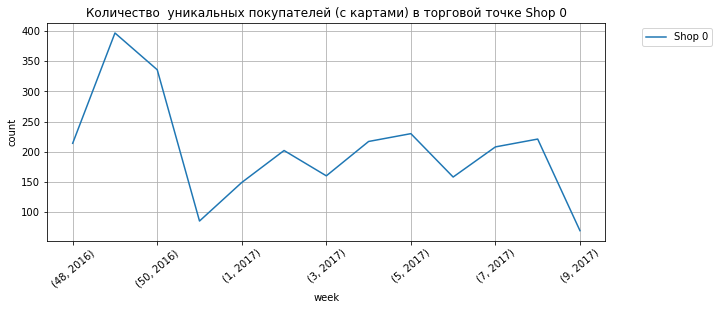

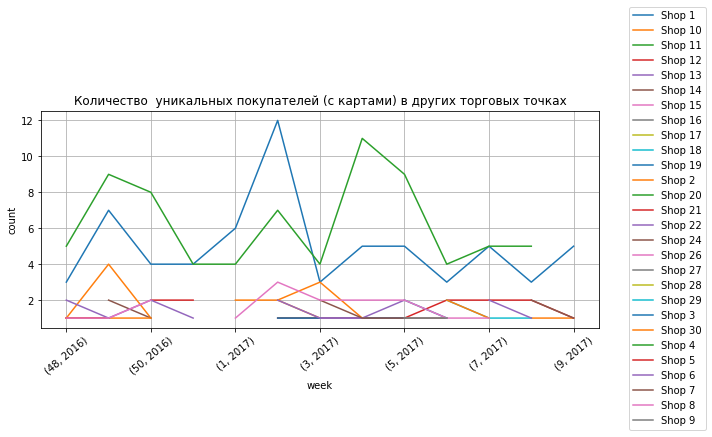

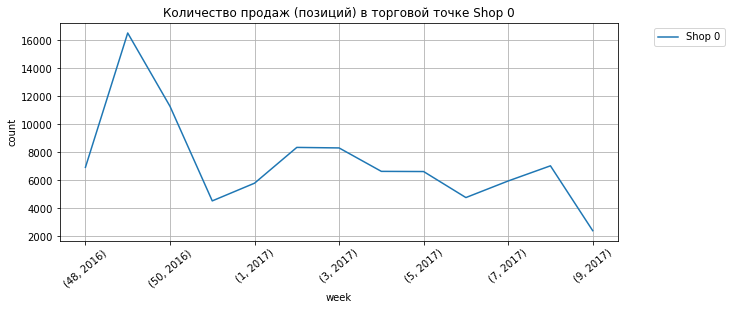

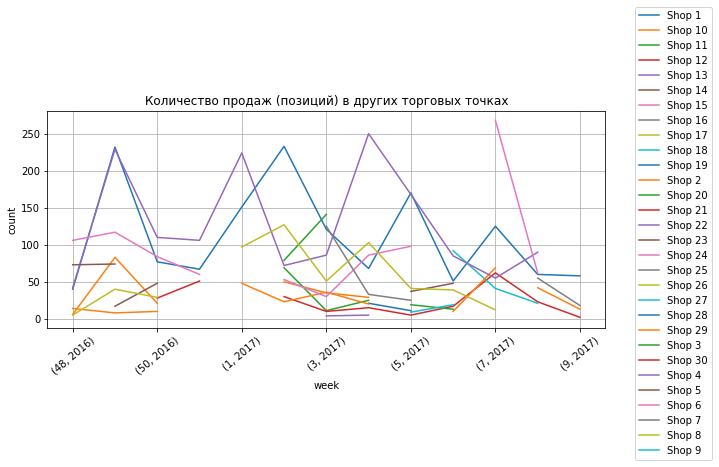

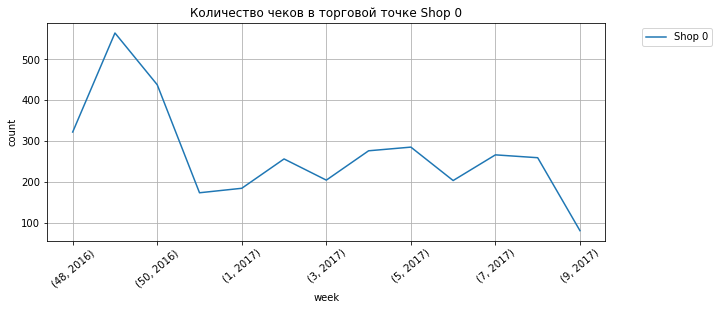

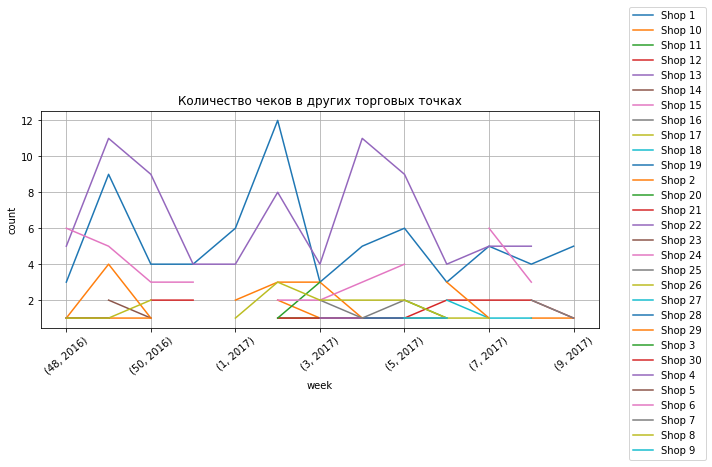

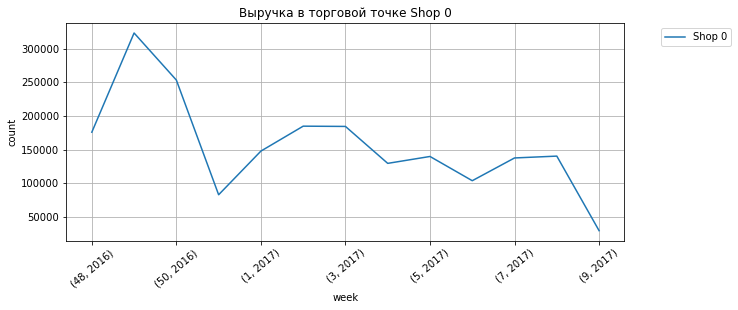

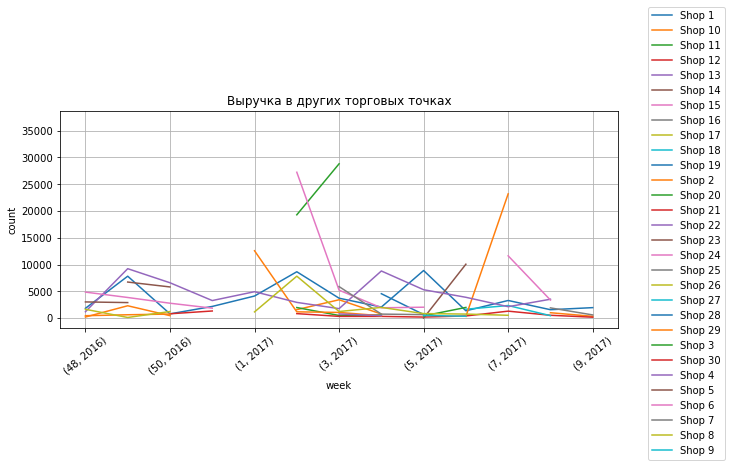

In [100]:
# статистика по неделям
graph(retail_data, 'week')

- Количество уникальных покупателей (с картами) к концу декабря имеет пиковое значение (самое большое) для Shop 0, оно и понятно, подготовка к Рождеству, надо закончить все начатые дела в старом году), для других точек, тоже прослеживается увеличение покупателей в этот период, но все же пиковое значение, например, для Shop 1 приходится на 2 неделю после НГ,а для Shop 4 - 4 неделя. Наблюдается какое-то непостоянство, видны явные спады активности "карточных" покупателей.
- Продажи позиций, кол-во чеков, выручка в Shop 0,  почти повторяют динамику покупателей. А вот в других точках нет такой зависиомости не прослеживается, кроме Shop 1, там схожесть имеется. Это означает, что в Shop 0 покупателей с картами большинство, Shop 1 и 4 таковых тоже много. Всплески в этих двух магазинах почти синхронны. 
- Точки, кроме 0, 1, и 4, не в каждую неделю фиксируются продажи

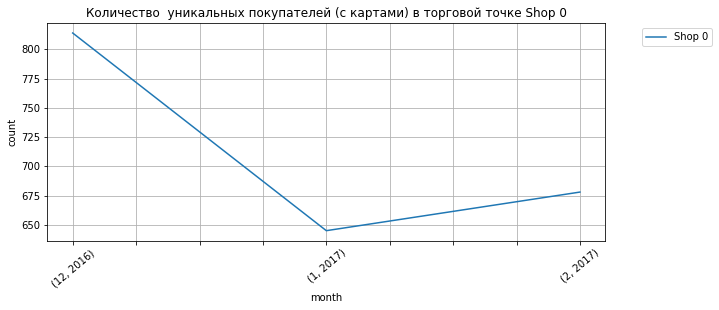

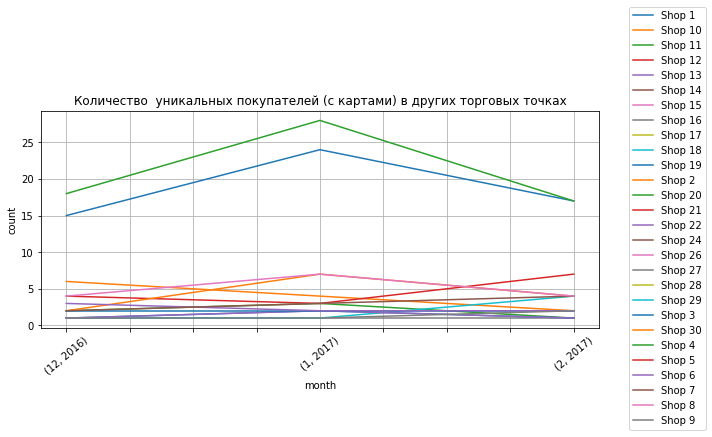

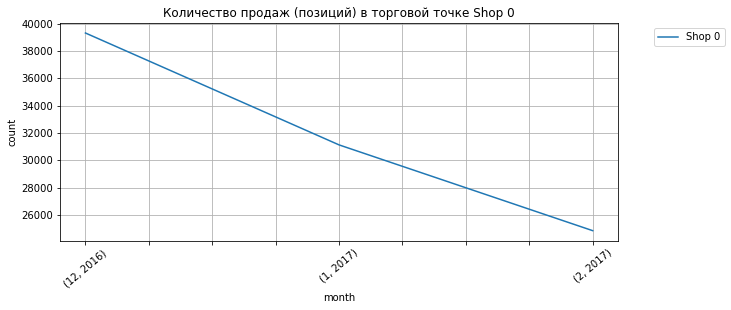

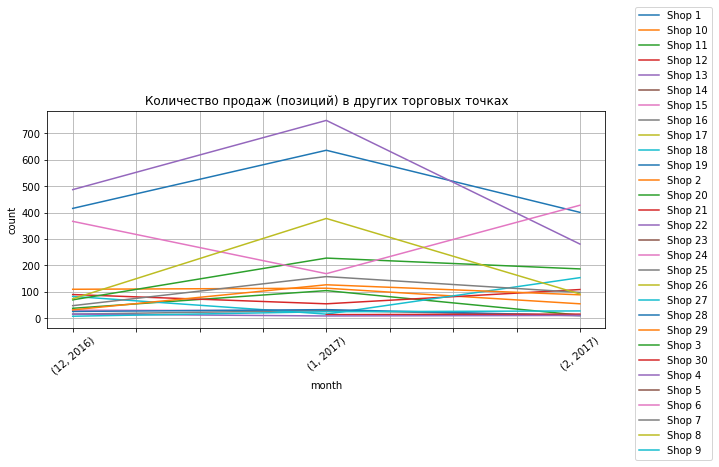

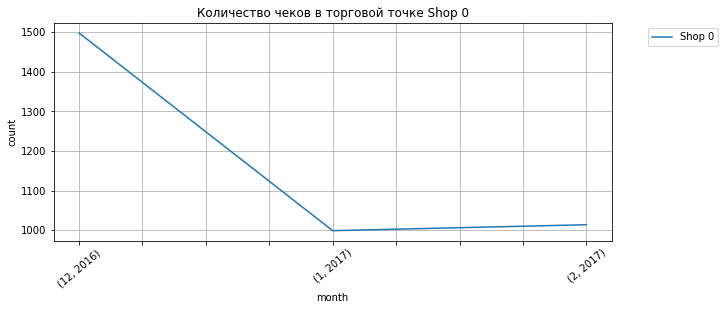

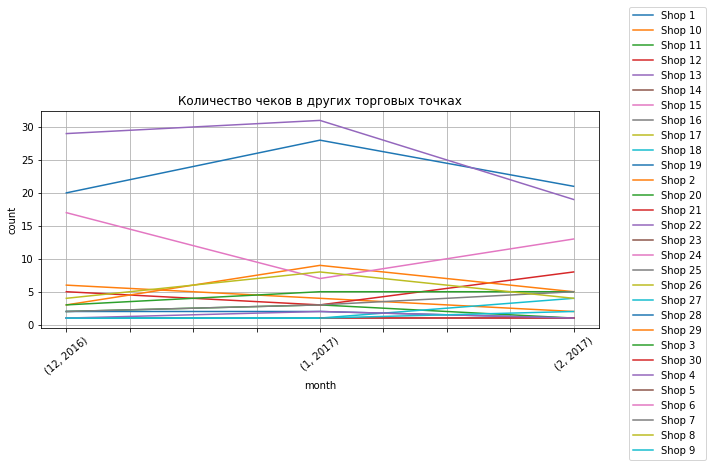

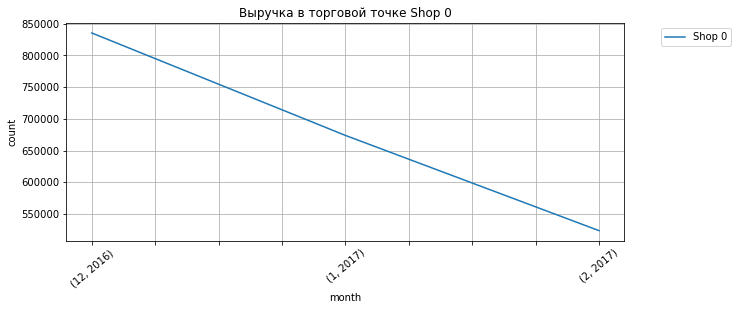

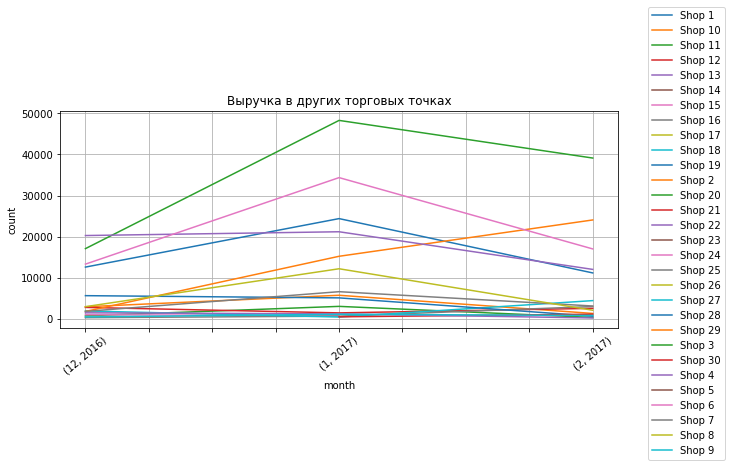

In [101]:
# статистика по месяцам
graph(retail_data, 'month')

На графиках по месяцам заметно, что в точке Shop 0	все показатели после декабря снижаются, а вот в остальных, кроме Shop 6 (в количестве чеков и количестве товара), или ровные значения или подъем показателей приходится на январь. Странное, конечно поведение у самого популярного магазина, может еще не все даннные были выгружены с этой точки?

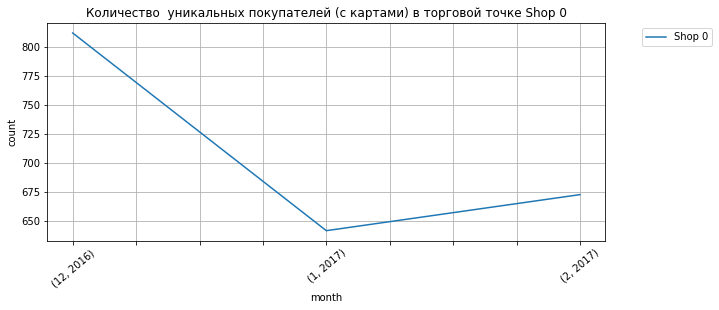

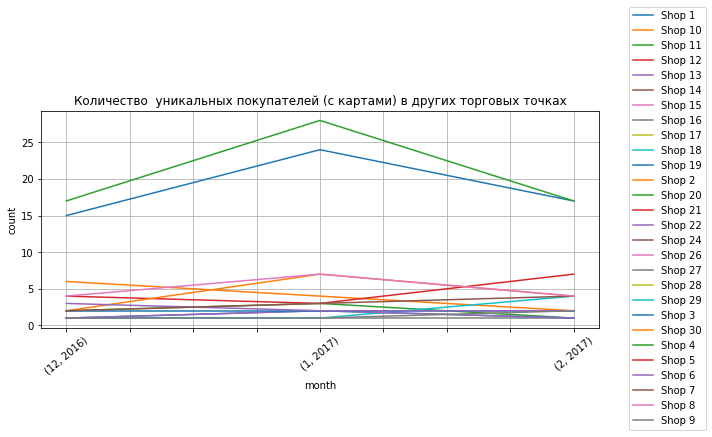

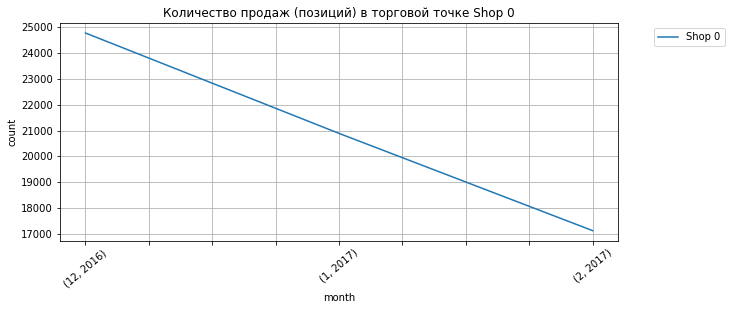

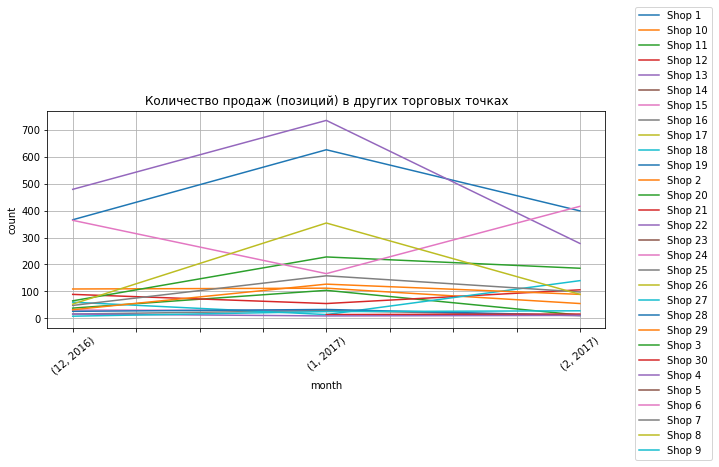

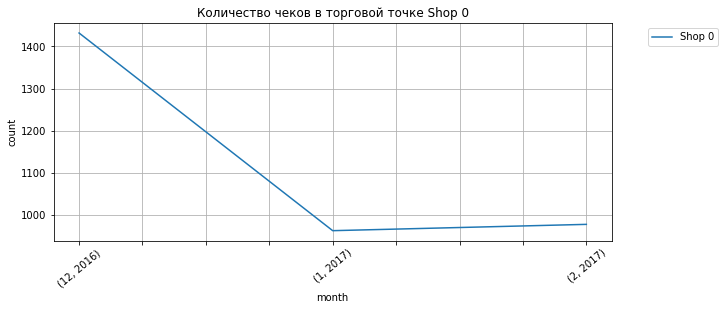

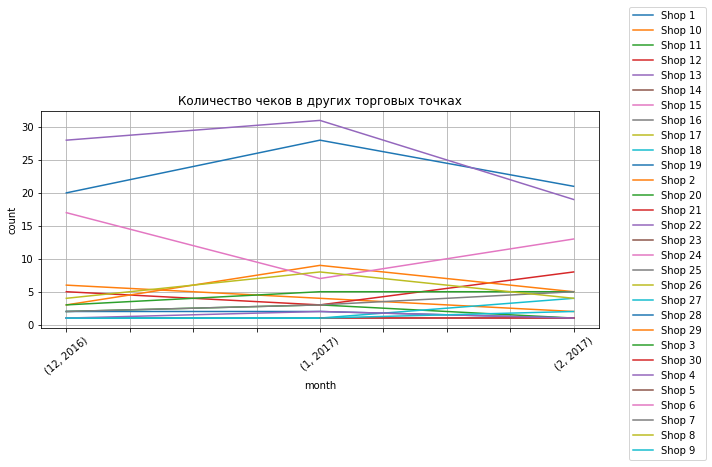

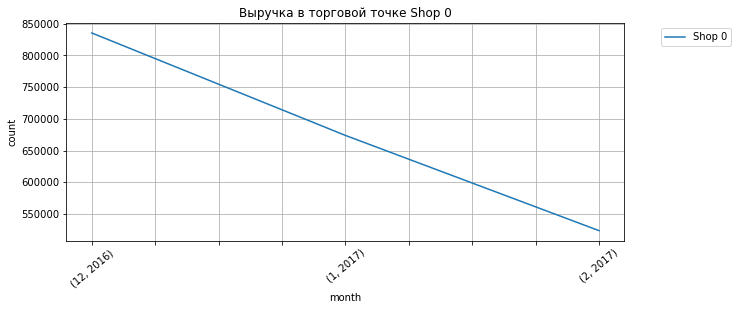

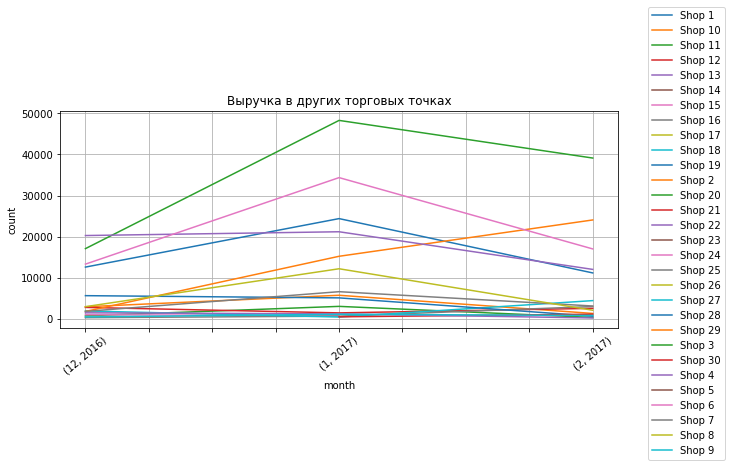

In [102]:
# отфильтруем строки, где количество равно 0
graph(retail_data.query('quantity > 0'), 'month')

Можно сказать, что при отсутствии строк, где количество равно 0, динамика показателей сохраняется везде, вот только в Shop 0 значения выше, получается, что нуливых значений Shop 0	достаточное количество, а в остальных, не такое большое, чтоб влиять на статистику.

#### - Количество возврата за неделю, месяц по торговым точкам (график)

In [103]:
# датафрейм отфильтрованный по количеству товаров
retail_data_refund = retail_dataset_free_c.query('quantity < 0').copy()

In [104]:
retail_data_refund

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,month_year,week,year,month
467,468,537032,21275,-31,2016-12-03 16:50:00,0,Shop 0,0,December-2016,48,2016,12
501,503,540119,22865,-61,2017-01-05 10:07:00,0,Shop 0,0,January-2017,1,2017,1
907,910,540241,35957,-940,2017-01-05 15:17:00,0,Shop 0,0,January-2017,1,2017,1
1777,1784,537009,84534B,-81,2016-12-03 15:38:00,0,Shop 0,0,December-2016,48,2016,12
1918,1928,540010,22501,-101,2017-01-04 11:13:00,0,Shop 0,0,January-2017,1,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...
102453,103022,542225,85096,-60,2017-01-26 13:10:00,0,Shop 0,0,January-2017,4,2017,1
102962,103534,540558,21258,-30,2017-01-10 10:04:00,0,Shop 0,0,January-2017,2,2017,1
104011,104588,541487,85118,-36,2017-01-18 13:19:00,0,Shop 0,0,January-2017,3,2017,1
104382,104960,540564,22617,-2601,2017-01-10 10:36:00,0,Shop 0,0,January-2017,2,2017,1


In [105]:
retail_data_refund = pd.merge(retail_data_refund, product_codes_1, how='left', left_on='item_id', right_on='product_id')

In [106]:
retail_data_refund['total_refund'] = retail_data_refund.quantity * retail_data_refund.product_codes_medians

In [107]:
def graph_refund(metric, period, agg):
    retail_refund_count_0 = retail_data_refund.pivot_table(
                             index = [period, 'year'], columns = 'shop_id', values = metric, aggfunc = agg)
    retail_refund_count_0.sort_values(by='year').plot(figsize = (10,4), grid = True)
    plt.xticks(rotation=40)
    plt.title('Возврат в торговых точках') 
    plt.gca().set(xlabel=period, ylabel='count')
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.show()

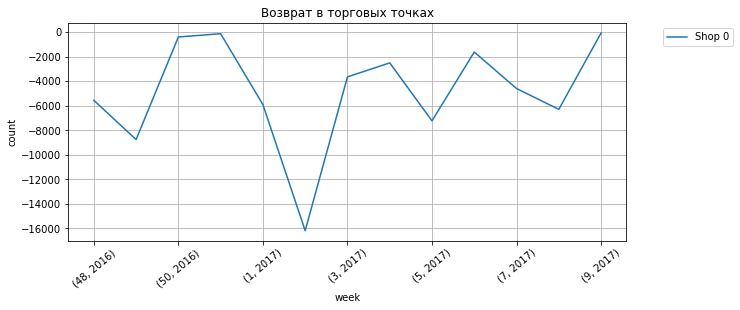

In [108]:
graph_refund('total_refund', 'week', 'sum')

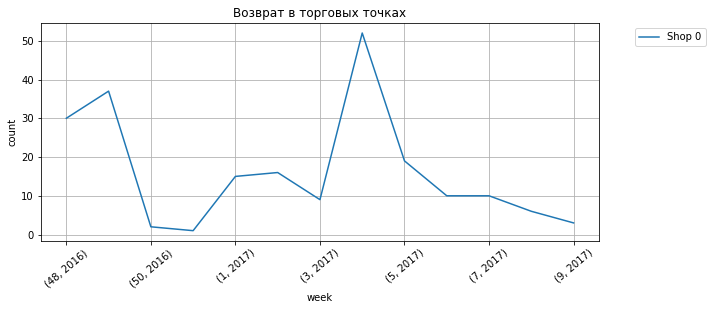

In [109]:
graph_refund('quantity', 'week', 'count')

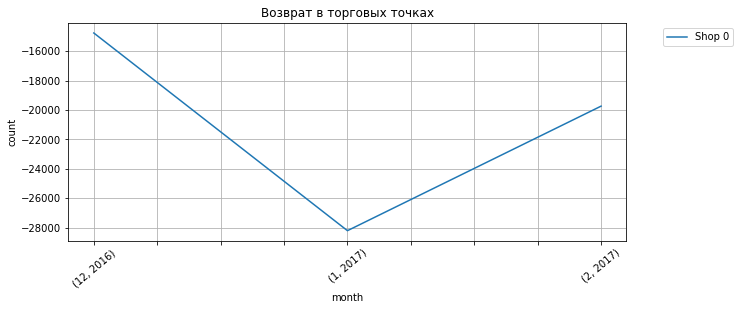

In [110]:
graph_refund('total_refund', 'month', 'sum')

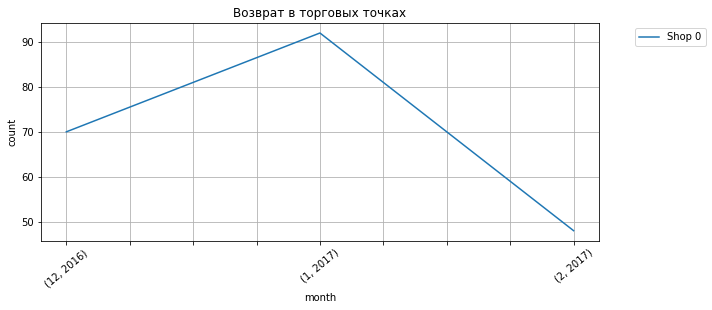

In [111]:
graph_refund('quantity', 'month', 'count')

Так называемые возвраты обнаружены только в точке Shop 0, и их пиковые значения по количеству товаров приходится на 4 неделю 2017 г, а по сумме - на 2.

### Часть 4. Оценка эффективности торговых точек

#### - Объем продаж (выручка) по торговым точкам за весь период

In [112]:
# Функция для построения графиков
def graph_2(data, column, name1, name2):
    ig, ax = plt.subplots(figsize = (15,7))
    sns.barplot(data=data, x = 'shop_id', y = column)
    sns.despine() 
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/1.5,
            height + 3,
            '{:1.0f}'.format(height),
            ha="center")
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams["axes.titlesize"] = 20
    plt.xticks(rotation=40)
    plt.title(name1)
    plt.xlabel('торговая точка')
    plt.ylabel(name2)
    plt.show()        

In [113]:
df_1 = df_pivot.groupby('shop_id')['total'].sum().reset_index().sort_values(by='total', ascending=False)

In [114]:
df_1.head()

,shop_id,total
0,Shop 0,2033244.295
23,Shop 3,104513.065
27,Shop 6,64718.625
25,Shop 4,53518.090
1,Shop 1,48186.125


In [115]:
df_1 = df_1.query('shop_id != "Shop 0"')  # отфильтруем, т.к. выручка у Shop 0 значения на много больше остальных точек

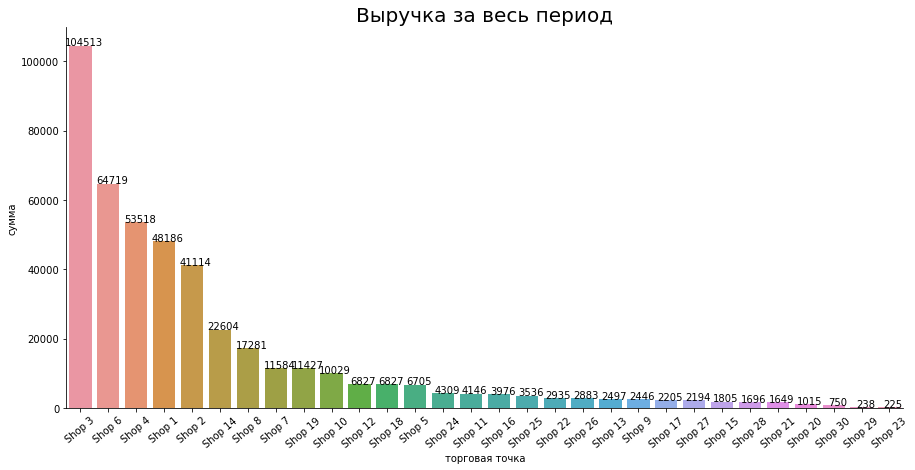

In [116]:
graph_2(df_1, 'total', 'Выручка за весь период', 'сумма')

#### - Среднее количество позиций в чеке за весь период

Сравним количество всего позиций и позиций, количество которых больше 0.

In [117]:
retail_data.query('quantity > 0').groupby('shop_id')['item_id'].count().head()

shop_id
Shop 0     62788
Shop 1      1391
Shop 10      276
Shop 11      154
Shop 12      250
Name: item_id, dtype: int64

In [118]:
df_pivot.groupby('shop_id').agg({'item_id':'sum'}).head()

,item_id
shop_id,
Shop 0,95290
Shop 1,1453
Shop 10,279
Shop 11,155
Shop 12,254


Те же 30 %, но все они в Shop 0. Учтем эти позиции с нулем в количестве, не будем их удалять, т.к. вопрос стоял именно о количестве позиций в чеке без учета коичества каждой позиции.

In [119]:
df_pivot.head()

,shop_id,week,month,year,customer_id,item_id,purchase_id,total
0,Shop 0,1,1,2017,149,5805,184,147803.165
1,Shop 0,2,1,2017,202,8361,256,184849.970
2,Shop 0,3,1,2017,160,8324,204,184461.170
3,Shop 0,4,1,2017,217,6649,276,129564.810
4,Shop 0,5,1,2017,65,1987,79,27300.375


In [120]:
df_2 = df_pivot.groupby('shop_id').agg({'item_id':'sum', 'purchase_id':'sum'}).reset_index()

In [121]:
df_2

,shop_id,item_id,purchase_id
0,Shop 0,95290,3511
1,Shop 1,1453,69
2,Shop 10,279,12
3,Shop 11,155,6
4,Shop 12,254,16
5,Shop 13,35,4
6,Shop 14,150,5
7,Shop 15,60,2
8,Shop 16,56,3
9,Shop 17,38,2


In [122]:
df_2['average_item'] = df_2['item_id'] / df_2['purchase_id']

In [123]:
df_2 = df_2.sort_values(by='average_item', ascending=False)

In [124]:
df_2.query('purchase_id >= 10')

,shop_id,item_id,purchase_id,average_item
23,Shop 3,485,13,37.307692
29,Shop 8,544,16,34.000000
28,Shop 7,304,10,30.400000
0,Shop 0,95290,3511,27.140416
27,Shop 6,964,37,26.054054
2,Shop 10,279,12,23.250000
1,Shop 1,1453,69,21.057971
25,Shop 4,1517,79,19.202532
4,Shop 12,254,16,15.875000
12,Shop 2,248,17,14.588235


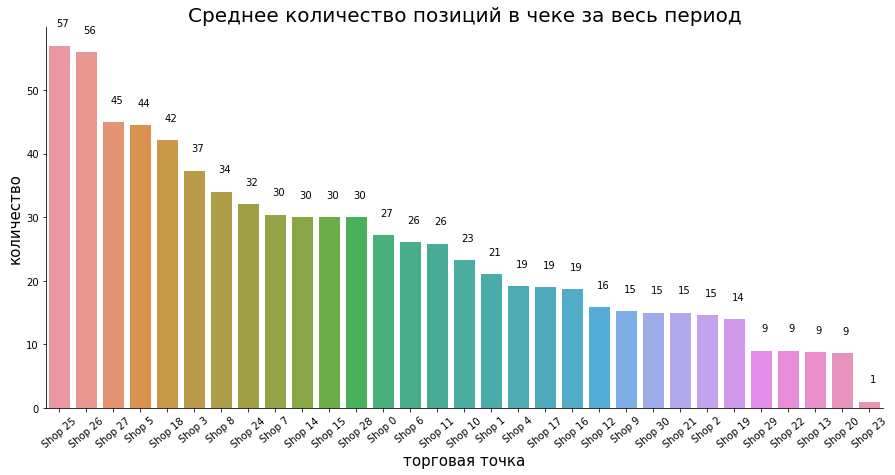

In [125]:
graph_2(df_2, 'average_item', 'Среднее количество позиций в чеке за весь период', 'количество')

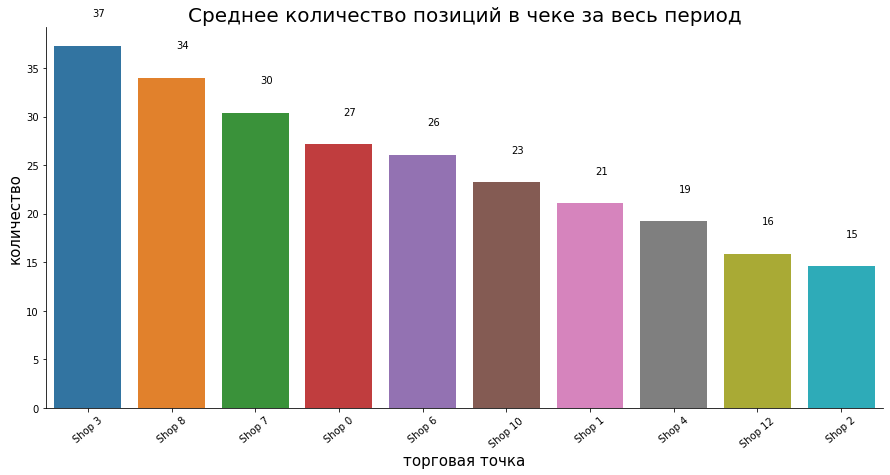

In [126]:
graph_2(df_2.query('purchase_id >= 10'), 'average_item', 'Среднее количество позиций в чеке за весь период', 'количество')

#### - Средний чек за весь период

 Средний чек будем считать без строк в которых quantity = 0, т.е. где такой товар один в чеке.

In [127]:
df_pivot.groupby('shop_id').agg({'total':'sum', 'purchase_id':'sum'}).reset_index().head()

,shop_id,total,purchase_id
0,Shop 0,2033244.295,3511
1,Shop 1,48186.125,69
2,Shop 10,10028.960,12
3,Shop 11,4145.890,6
4,Shop 12,6827.400,16


In [128]:
retail_data.query('quantity > 0').groupby('shop_id').agg({'total':'sum', 'purchase_id':'nunique'}).reset_index()

,shop_id,total,purchase_id
0,Shop 0,2033244.295,3371
1,Shop 1,48186.125,69
2,Shop 10,10028.960,12
3,Shop 11,4145.890,6
4,Shop 12,6827.400,16
5,Shop 13,2496.775,4
6,Shop 14,22604.325,4
7,Shop 15,1805.400,2
8,Shop 16,3976.115,3
9,Shop 17,2205.150,2


In [129]:
df_3 = retail_data.query('quantity > 0').groupby('shop_id').agg({'total':'sum', 'purchase_id':'nunique'}).reset_index()

In [130]:
df_3['average_check'] = df_3['total']  / df_3['purchase_id']

In [131]:
df_3 = df_3.sort_values(by='average_check', ascending=False)

In [132]:
df_3

,shop_id,total,purchase_id,average_check
23,Shop 3,104513.065,13,8039.466538
6,Shop 14,22604.325,4,5651.081250
17,Shop 24,4308.520,1,4308.520000
18,Shop 25,3535.960,1,3535.960000
19,Shop 26,2883.145,1,2883.145000
12,Shop 2,41114.485,17,2418.499118
11,Shop 19,11427.340,5,2285.468000
20,Shop 27,2193.960,1,2193.960000
27,Shop 6,64718.625,37,1749.152027
21,Shop 28,1695.620,1,1695.620000


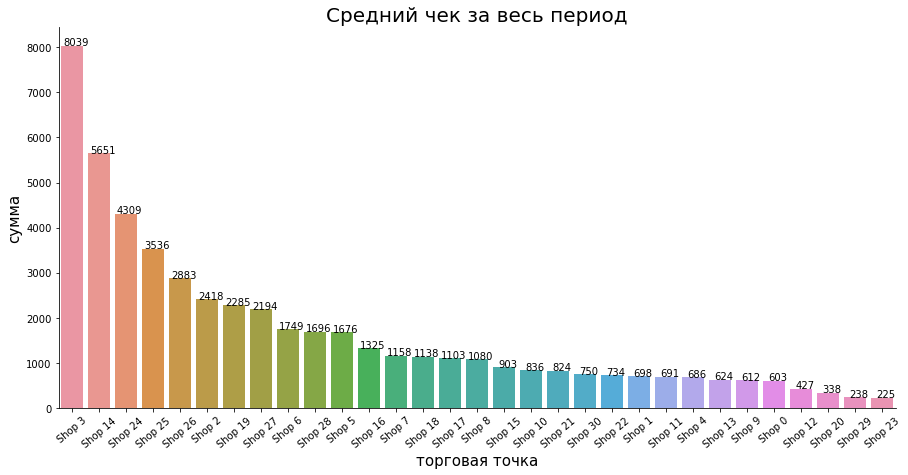

In [133]:
graph_2(df_3, 'average_check', 'Средний чек за весь период', 'сумма')

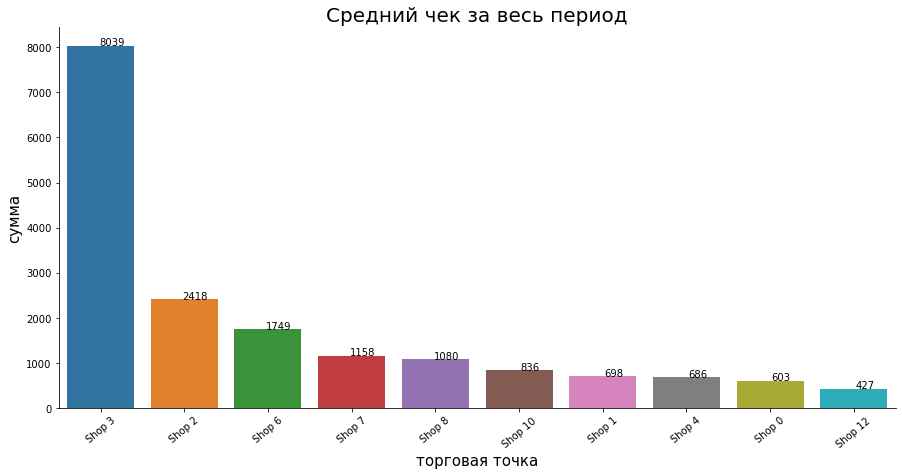

In [134]:
graph_2(df_3.query('purchase_id >= 10'), 'average_check', 'Средний чек за весь период', 'сумма')

In [135]:
df_3['result'] = df_3['total'] * df_3['purchase_id']

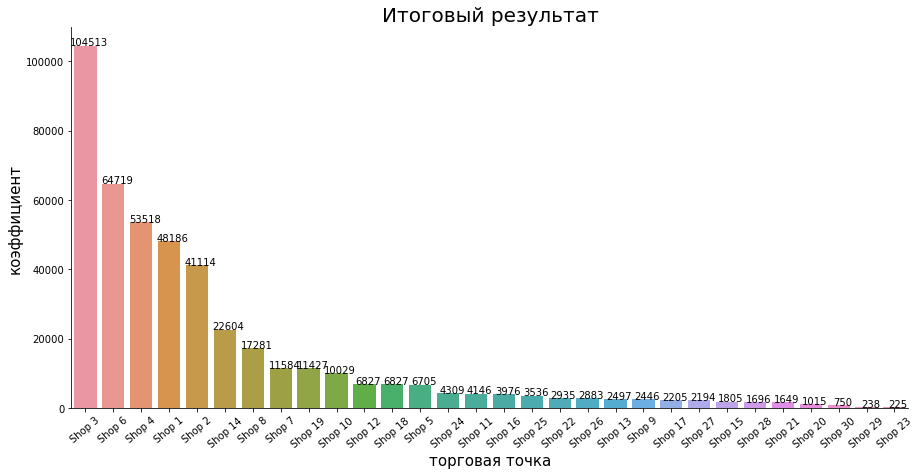

In [136]:
graph_2(df_3.query('shop_id != "Shop 0"').sort_values(by='total', ascending=False), 'total', 'Итоговый результат', 'коэффициент')

#### Вывод
- Выручка за весь период - Shop 0, очень большое значение в сранении с другими точками, лучшие пять из остальных - это 3, 6, 4, 1 и 2 по убыванию
- Среднее количество позиций в чеке за весь период - Shop 0 уже не на первом месте, т.к. есть точки в котором всего один чек с большим количеством позиций в чеке. Если отфильтровать по количеству всего чеков, хотя бы от 10 за весь период, то мы увидим 10 точек и среди них лучшие это - 3, 8, 7, 0 по убыванию
- Средний чек за весь период - опять, если отфильтровать по количеству чеков, то мы увидим, что выбивается из этого числа Shop 3, 8000 у.е, хотя там чеков всего 13, следующие уже от 2,5 у.е. и это точки 2, 6, где чеков уже больше, 17 и 37 соответственно и т.д. Shop 0 на девятом месте, после 1 и 4 точки, с суммой меньше тысячи. 

### Часть 5. Проверка гипотез

In [137]:
retail_data

,index,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,month_year,week,year,month,product_id,product_codes_medians,total
0,0,538280,21873,11,2016-12-10 12:50:00,18427,Shop 0,0,December-2016,49,2016,12,21873,1.630,17.93
1,1,538862,22195,0,2016-12-14 14:11:00,22389,Shop 0,1,December-2016,50,2016,12,22195,3.290,0.00
2,2,538855,21239,7,2016-12-14 13:50:00,22182,Shop 0,1,December-2016,50,2016,12,21239,1.630,11.41
3,3,543543,22271,0,2017-02-09 15:33:00,23522,Shop 0,1,February-2017,6,2017,2,22271,4.370,0.00
4,4,543812,79321,0,2017-02-13 14:40:00,23151,Shop 0,1,February-2017,7,2017,2,79321,7.855,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102745,105330,538566,21826,1,2016-12-13 11:21:00,0,Shop 0,0,December-2016,50,2016,12,21826,2.460,2.46
102746,105331,540247,21742,0,2017-01-05 15:56:00,21143,Shop 0,0,January-2017,1,2017,1,21742,9.335,0.00
102747,105332,538068,85048,1,2016-12-09 14:05:00,23657,Shop 0,1,December-2016,49,2016,12,85048,8.330,8.33
102748,105333,538207,22818,11,2016-12-10 11:33:00,18427,Shop 0,0,December-2016,49,2016,12,22818,0.830,9.13


Не будем удалять выбросы в данных, а они есть, т.к. используемый для проверки гипотез тест Манна-Уитни терпим к выбросам

Выделим две группы покупателей: те которые учавствуют в программе лояльности и кто не учавствует.

In [138]:
retail_dataset_0 = retail_data.query('loyalty_program == 0')

In [139]:
retail_dataset_0.shape

(79360, 15)

In [140]:
retail_dataset_1 = retail_data.query('loyalty_program == 1')

In [141]:
retail_dataset_1.shape

(23371, 15)

In [142]:
retail_dataset_0 = retail_dataset_0.groupby('purchase_id').agg({'total':'sum', 'quantity':'sum'}).reset_index()

In [143]:
retail_dataset_0

,purchase_id,total,quantity
0,536367,297.320,71
1,536368,96.090,11
2,536369,13.200,2
3,536370,1249.205,427
4,536371,462.150,79
...,...,...,...
2701,545190,266.300,74
2702,545191,328.045,90
2703,545215,932.545,348
2704,545216,540.615,190


#### - Средний чек у покупателей участвующих в программе лояльности не отличается от среднего чека у покупателей не участвующих в программе.

##### Нулевая гипотеза(Н0) – нет статистически значимого различия по среднему чеку между группами, альтернативная гипотеза(Н1) – разница по среднему чеку между группами статистически значима.¶

In [144]:
retail_dataset_1 = retail_dataset_1.groupby('purchase_id').agg({'total':'sum', 'quantity':'sum'}).reset_index()

In [145]:
alpha = 0.05 # критический уровень статистической значимости

In [146]:
# Найдём относительные различия в среднем чеке между группами
results_1 = stats.mannwhitneyu(retail_dataset_0['total'], retail_dataset_1['total'])

In [147]:
print("p-значение: {0:.9f}".format(results_1.pvalue))
if (results_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.037622853
Отвергаем нулевую гипотезу


##### Нулевую гипотезу отвергаем, т.е. разница между группами статистически значима.

Выбирая уровень значимости 0.05, а не, например, 0.01, мы рискуем получить ошибку первого рода — ситуация, когда отвергнута правильная нулевая гипотеза. В нашем случае, тогда средний чек между группами был бы признан равным.

#### - Среднее количество товара в чеке у покупателей участвующих в программе лояльности равно среднему количеству товара в чеке у покупателей не участвующих в программе.

Нулевая гипотеза(Н0) – нет статистически значимого различия по количеству товара в чеке между группами, альтернативная гипотеза(Н1) – разница по количеству товара в чеке между группами статистически значима.¶

In [148]:
# Найдём относительные различия в среднем чеке между группами
results_2 = stats.mannwhitneyu(retail_dataset_0['quantity'], retail_dataset_1['quantity'])

In [149]:
print("p-значение: {0:.9f}".format(results_2.pvalue))
if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.158901494
Не получилось отвергнуть нулевую гипотезу


##### Причин отвергать нулевую гипотезу и считать, что в среднем количестве товара в чеке есть различия, нет.

### Часть 5. Подготовка презентации

In [150]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102731 entries, 0 to 102749
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  102731 non-null  int64         
 1   purchase_id            102731 non-null  object        
 2   item_id                102731 non-null  object        
 3   quantity               102731 non-null  int64         
 4   purchase_date          102731 non-null  datetime64[ns]
 5   customer_id            102731 non-null  int64         
 6   shop_id                102731 non-null  object        
 7   loyalty_program        102731 non-null  int64         
 8   month_year             102731 non-null  object        
 9   week                   102731 non-null  int64         
 10  year                   102731 non-null  int64         
 11  month                  102731 non-null  int64         
 12  product_id             102731 non-null  obje

In [151]:
retail_data.to_csv('retail_data_for_dashboard.csv')

Презентация: 

https://docs.google.com/presentation/d/1wcBDwBdeMd46tEotwlYbfPdoRaR5gZFLSQ3_e0i4gl0/edit?usp=sharing

### Общий вывод

- Были узучены данные таблиц, продаж и прайса, заменены названия столбцов, типы данных в столбцах. 
- Дубликаты не стали удалять в таблице продаж.
  - Произведена замены значений NaN в столбце "customer_id" на "0". 
  - 1% строк, которые содержат наименования товаров, которые выделены отдельным списком, и обозначены как "комиссии" (для нас подозрительные). Почистили от таких строк датафрейм. 
  - Убраны все строки с идентификатором чека равным С*****, в таких строках значения количества товара всегда < 0. 
  - Нулевые значения в количестве убирать и изменять не стали, просто при анализе и расчете метрик, не стали учитывать такие    строки.
- Убрали из таблицы прайса строки, где цена товара = 0. Товар, на который цена не одна, для таких товаров нашли среднюю ( медиану) цену в зависимости от товара. 
- Добавлены данных в таблицу продаж (неделя, месяц).
- Исследуемый период с 1 декабря 2016 года по 31 марта 2017 года, по данным увидели, что есть период, когда магазины не работали.

Построение графиков
- При построении графиков убрали все строки со значениями меньше 0 в количестве товара. Посчитали сумму каждой позиции, для подсчета выручки, перемножив кол-во и цену.
- Выяснилось, что количество уникальных покупателей (с картами) к концу декабря имеет пиковое значение (самое большое) для Shop 0, для других точек, тоже прослеживается увеличение покупателей в этот период, но все же пиковое значение, например, для Shop 1 приходится на 2 неделю после НГ,а для Shop 4 - 4 неделя. Наблюдается какое-то непостоянство, видны явные спады активности "карточных" покупателей.
- Продажи позиций, кол-во чеков, выручка в Shop 0,  почти повторяют динамику покупателей с картами. А вот в других точках такая зависиомость не прослеживается, кроме Shop 1 и 4, там схожесть имеется. Это означает, что в Shop 0 покупателей с картами большинство, Shop 1 и 4 таковых тоже много. Всплески в этих двух магазинах почти синхронны. 
- Точки, кроме 0, 1, и 4, не в каждую неделю фиксируются продажи
- На графиках по месяцам заметно, что в точке Shop 0 все показатели после декабря снижаются, а вот в остальных, кроме Shop 6 (в количестве чеков и количестве товара), или ровные значения или подъем показателей приходится на январь.
- Так называемые возвраты обнаружены только в точке Shop 0, и их пиковые значения по количеству товаров приходится на 4 неделю 2017 г, а по сумме возврата на 2 того же года. Этот оцениваемый параметр нельзя считать информативным, т.к. был выведен путем умозаключений, которые могут быть ложными. Поэтому позже запланированную метрику по возвратам не стали реализовывать.

Метрики: выручка за весь период - показывает сколько денег принес покупатель, среднее количество позиций в чеке - ее изменение в лучшую или в худшую сторону может показать становится интересенее и разнообразнее ассортимент в магазине или наоборот. Средний чек - это метрика наиболее точно отражающая ситуацию с продажами в магазинах.
- Выручка за весь период - Shop 0, очень большое значение в сранении с другими точками, лучшие пять из остальных - это 3, 6, 4, 1 и 2 по убыванию
- Среднее количество позиций в чеке за весь период - Shop 0 уже не на первом месте, т.к. есть точки в котором всего один чек с большим количеством позиций в чеке. Если отфильтровать по количеству всего чеков, хотя бы от 10 за весь период, то мы увидим 10 точек и среди них лучшие это - 3, 8, 7, 0 по убыванию
- Средний чек за весь период - опять, если отфильтровать по количеству чеков, то мы увидим, что выбивается из этого числа Shop 3, 8000 у.е, следующие уже от 2,5 у.е. и это точки 2, 6 и т.д. Shop 0, 1, 4 на девятом, десятом и одиннадцатом месте с суммой меньше тысячи.

Хоть выручка и очень большая в Shop 0, средний чек один из самых низких, это означает, что покупатели за одну покупку не тратят большое количество денег, выручка формируется из большого количества покупателей, в этот магазин часто ходят, поэтому немного покупают, об это же и говорит и количество товаров (позиций) в чеке. Shop 3, выручка большая среди остальных  точек, товаров в чеке много, но вот самих чеков мало, маленький оптовый магазин? Shop 6, высокие позатели, но продажи  тоже нерегулярные, если эти продажи есть, то они большие и по суммам и по количеству проданного товара. 1 и 4 очень выгодно выглядят среди остальных точек, т.к. продажи постоянные, ими пользуютя регулярно и это очень хороший показатель.
Стало понятно, что не хватает метрики количества чеков, он помогает сравнивать другие метрики, т.к. магазины разные по посещаемости (пришлось подглядывать в табличку).

- Посчитали статистическую значимость различия по количеству товара в чеке и в среднем чеке между покупателями участвующими в программе лояльности и не участвующими. Выяснилось, что есть статистически значимые различия по количеству товара в чеке между группами, и нет статистически значимого различия по среднему чеку между группами.

Подводя итог всему выше сказанному, регулярность продаж среди остальных отличаются Shop 0, 1 и 4, но не все метрики в этих магазинах показывают хороший результат. Выделяется Shop 3 и 6 (у котрых чеков больше 10), которые если продают, то по многу. 
Участие в программе лояльности не отражается на чеке покупателя, а вот по количеству товара в чеке нельзя сделать такой вывод, разница присутствует.